### K Nearest Neighbours Algorithm

Neighbor based learning method are of both types namely supervised and unsupervised. Supervised neighbors-based learning can be used for both classification as well as regression predictive problems but, it is mainly used for classification predictive problems in industry.
Neighbors based learning methods do not have a specialised training phase and uses all the data for training while classification. It also does not assume anything about the underlying data. That’s the reason they are lazy and non-parametric in nature.
The main principle behind nearest neighbor methods is:
1. To find a predefined number of training samples closet in distance to the new data point
2. Predict the label from these number of training samples

Here, the number of samples can be a user-defined constant like in K-nearest neighbor learning or vary based on the local density of point like in radius-based neighbor learning.


**sklearn.neighbors Module**Scikit-learn have sklearn.neighbors module that provides functionality for both unsupervised and supervised neighbors-based learning methods. As input, the classes in this module can handle either NumPy arrays or scipy.sparse matrices.

#### Types of algorithms

Different types of algorithms which can be used in neighbor-based methods’ implementation are as follows:
1. **Brute Force**

The brute-force computation of distances between all pairs of points in the dataset provides the most naïve neighbor search implementation. Mathematically, for N samples in D dimensions, brute-force approach scales as 𝑶[𝑫𝑵𝟐].
For small data samples, this algorithm can be very useful, but it becomes infeasible as and when number of samples grows. Brute force neighbor search can be enabled by writing the keyword algorithm=’brute’.

2. **K-D Tree**

One of the tree-based data structures that have been invented to address the computational inefficiencies of the brute-force approach, is KD tree data structure. Basically, the KD tree is a binary tree structure which is called K-dimensional tree. It recursively partitions the parameters space along the data axes by dividing it into nested orthographic regions into which the data points are filled.

Advantages

Following are some advantages of K-D tree algorithm:
Construction is fast: As the partitioning is performed only along the data axes, K-D tree’s construction is very fast.
Less distance computations: This algorithm takes very less distance computations to determine the nearest neighbor of a query point. It only takes 𝑶[𝐥𝐨𝐠 (𝑵)] distance computations.

Disadvantages

Fast for only low-dimensional neighbor searches: It is very fast for low-dimensional (D < 20) neighbor searches but as and when D grow it becomes inefficient. As the partitioning is performed only along the data axes,
K-D tree neighbor searches can be enabled by writing the keyword algorithm=’kd_tree’.

##### **3. Ball Tree**


As we know that KD Tree is inefficient in higher dimensions, hence, to address this inefficiency of KD Tree, Ball tree data structure was developed. Mathematically, it recursively divides the data, into nodes defined by a centroid C and radius r, in such a way that each point in the node lies within the hyper-sphere defined by centroid C and radius r. It uses triangle inequality, given below, which reduces the number of candidate points for a neighbor search: |𝑿+𝒀|≤|𝑿|+|𝒀|

**Advantages**

Following are some advantages of Ball Tree algorithm:
Efficient on highly structured data: As ball tree partition the data in a series of nesting hyper-spheres, it is efficient on highly structured data.
Out-performs KD-tree: Ball tree out-performs KD tree in high dimensions because it has spherical geometry of the ball tree nodes.

**Disadvantages**

Costly: Partition the data in a series of nesting hyper-spheres makes its construction very costly
Ball tree neighbor searches can be enabled by writing the keyword algorithm=’ball_tree’.



#### Choosing Nearest Neighbors Algorithm

**Number of samples (N) and Dimensionality (D)**
1. These are the most important factors to be considered while choosing Nearest Neighbor algorithm. It is because of the reasons given below:
2. The query time of Brute Force algorithm grows as O[DN].
3. The query time of Ball tree algorithm grows as O[D log(N)].
4. The query time of KD tree algorithm changes with D in a strange manner that is very difficult to characterize. When D < 20, the cost is O[D log(N)] and this algorithm is very efficient. On the other hand, it is inefficient in case when D > 20 because the cost increases to nearly O[DN].

### Data Structures

Another factor that affect the performance of these algorithms is intrinsic dimensionality of the data or sparsity of the data. It is because the query times of Ball tree and KD tree algorithms can be greatly influenced by it. Whereas, the query time of Brute Force algorithm is unchanged by data structure. Generally, Ball tree and KD tree algorithms produces faster query time when implanted on sparser data with smaller intrinsic dimensionality.

**Number of Neighbors (k)**
The number of neighbors (k) requested for a query point affects the query time of Ball tree and KD tree algorithms. Their query time becomes slower as number of neighbors (k) increases. Whereas the query time of Brute Force will remain unaffected by the value of k.

**Number of query points**
Because, they need construction phase, both KD tree and Ball tree algorithms will be effective if there are large number of query points. On the other hand, if there are a smaller number of query points, Brute Force algorithm performs better than KD tree and Ball tree algorithms.

### KNN Learning

k-NN (k-Nearest Neighbor), one of the simplest machine learning algorithms, is non-parametric and lazy in nature. Non-parametric means that there is no assumption for the underlying data distribution i.e. the model structure is determined from the dataset. Lazy or instance-based learning means that for the purpose of model generation, it does not require any training data points and whole training data is used in the testing phase.
The k-NN algorithm consist of the following two steps:

**Step 1**

In this step, it computes and stores the k nearest neighbors for each sample in the training set.

**Step 2**

In this step, for an unlabeled sample, it retrieves the k nearest neighbors from dataset. Then among these k-nearest neighbors, it predicts the class through voting (class with majority votes wins).
The module, sklearn.neighbors that implements the k-nearest neighbors algorithm, provides the functionality for unsupervised as well as supervised neighbors-based learning methods.
The unsupervised nearest neighbors implement different algorithms (BallTree, KDTree or Brute Force) to find the nearest neighbor(s) for each sample. This unsupervised version is basically only step 1, which is discussed above, and the foundation of many algorithms (KNN and K-means being the famous one) which require the neighbor search. In simple words, it is Unsupervised learner for implementing neighbor searches.
On the other hand, the supervised neighbors-based learning is used for classification as well as regression.

### UnsuperVised KNN Learning

As discussed, there exist many algorithms like KNN and K-Means that requires nearest neighbor searches. That is why Scikit-learn decided to implement the neighbor search part as its own “learner”. The reason behind making neighbor search as a separate learner is that computing all pairwise distance for finding a nearest neighbor is obviously not very efficient. Let’s see the module used by Sklearn to implement unsupervised nearest neighbor learning along with example.

**Scikit-learn module**

**sklearn.neighbors.NearestNeighbors** is the module used to implement unsupervised nearest neighbor learning. It uses specific nearest neighbor algorithms named BallTree, KDTree or Brute Force. In other words, it acts as a uniform interface to these three algorithms.



In [7]:
## The example below will find the nearest neighbors between two sets of data by using the sklearn.neighbors.NearestNeighbors module.
## First, we need to import the required module and packages

from sklearn.neighbors import NearestNeighbors
import numpy as np

Input_data = np.array([[-1, 1], [-2, 2], [-3, 3], [1, 2], [2, 3], [3, 4], [4, 5]])
nrst_neigh = NearestNeighbors(n_neighbors=3, algorithm='ball_tree')
nrst_neigh.fit(Input_data)
distances, indices = nrst_neigh.kneighbors(Input_data)

print(distances)
print(indices)


[[0.         1.41421356 2.23606798]
 [0.         1.41421356 1.41421356]
 [0.         1.41421356 2.82842712]
 [0.         1.41421356 2.23606798]
 [0.         1.41421356 1.41421356]
 [0.         1.41421356 1.41421356]
 [0.         1.41421356 2.82842712]]
[[0 1 3]
 [1 2 0]
 [2 1 0]
 [3 4 0]
 [4 5 3]
 [5 6 4]
 [6 5 4]]


In [8]:
nrst_neigh.kneighbors_graph(Input_data).toarray()

array([[1., 1., 0., 1., 0., 0., 0.],
       [1., 1., 1., 0., 0., 0., 0.],
       [1., 1., 1., 0., 0., 0., 0.],
       [1., 0., 0., 1., 1., 0., 0.],
       [0., 0., 0., 1., 1., 1., 0.],
       [0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1.]])

Once we fit the unsupervised NearestNeighbors model, the data will be stored in a data structure based on the value set for the argument ‘algorithm’. After that we can use this unsupervised learner’s kneighbors in a model which requires neighbor searches

### SuperVised KNN Learning

The supervised neighbors-based learning is used for following:

1. Classification, for the data with discrete labels
2. Regression, for the data with continuous labels.

**Nearest Neighbor Classifier**

We can understand Neighbors-based classification with the help of following two characteristics:

1. It is computed from a simple majority vote of the nearest neighbors of each point.
2. It simply stores instances of the training data, that’s why it is a type of non-generalizing learning.

#### KNeighborsClassifier

The K in the name of this classifier represents the k nearest neighbors, where k is an integer value specified by the user. Hence as the name suggests, this classifier implements learning based on the k nearest neighbors. The choice of the value of k is dependent on data. Let’s understand it more with the help if an implementation example:

In this example, we will be implementing KNN on data set named Iris Flower data set by using scikit-learn KneighborsClassifer.

1. This data set has 50 samples for each different species (setosa, versicolor, virginica) of iris flower i.e. total of 150 samples.
2. For each sample, we have 4 features named sepal length, sepal width, petal length, petal width)

In [9]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [10]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [11]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [12]:
print(iris.data.shape)

(150, 4)


Now, we need to split the data into training and testing data. We will be using Sklearn train_test_split function to split the data into the ratio of 70 (training data) and 30 (testing data):

In [13]:
X = iris.data[:, :4]
y = iris.target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
print(X_train.shape)
print(X_test.shape)

(105, 4)
(45, 4)


In [16]:
from sklearn.neighbors import KNeighborsClassifier
## To check accuracy, we need to import Metrics model as follows;

from sklearn import metrics
## We are going to run it for k = 1 to 15 and will be recording testing accuracy, plotting it, showing confusion matrix and classification report:
Range_k = range(1,15)
scores = {}
scores_list = []

for k in Range_k:
  classifier = KNeighborsClassifier(n_neighbors=k)
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  scores[k] = metrics.accuracy_score(y_test,y_pred)
  scores_list.append(metrics.accuracy_score(y_test,y_pred))

result = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = metrics.classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)

Confusion Matrix:
[[16  0  0]
 [ 0 14  0]
 [ 0  2 13]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.88      1.00      0.93        14
           2       1.00      0.87      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45



Text(0, 0.5, 'Accuracy')

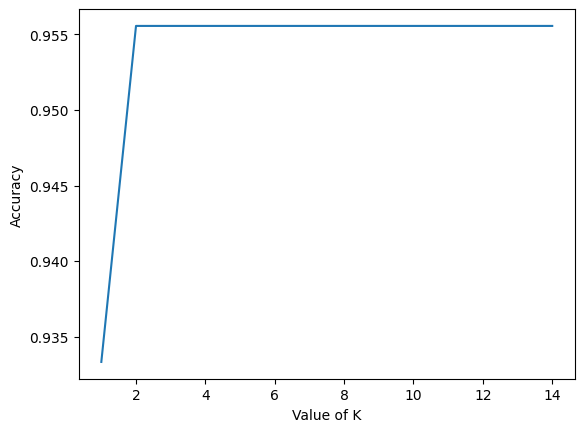

In [18]:
## Now, we will be plotting the relationship between the values of K and the corresponding testing accuracy. It will be done using matplotlib library

%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(Range_k,scores_list)
plt.xlabel("Value of K")
plt.ylabel("Accuracy")

In [19]:
classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

#### RadiusNeighborsClassifier

The Radius in the name of this classifier represents the nearest neighbors within a specified radius r, where r is a floating-point value specified by the user. Hence as the name suggests, this classifier implements learning based on the number neighbors within a fixed radius r of each training point. Let’s understand it more with the help if an implementation example:

In [20]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:, :4]
y = iris.target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [21]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
from sklearn.neighbors import RadiusNeighborsClassifier
rnc = RadiusNeighborsClassifier(radius=5)
rnc.fit(X_train, y_train)
classes = {0:'setosa',1:'versicolor',2:'virginicia'}
x_new = [[1,1,1,1]]
y_predict = rnc.predict(x_new)
print(classes[y_predict[0]])

setosa


### Nearest Neighbor Regressor

It is used in the cases where data labels are continuous in nature. The assigned data labels are computed on the basis on the mean of the labels of its nearest neighbors.
Followings are the two different types of nearest neighbor regressors used by scikit-learn:



#### **KNeighborsRegressor**

The K in the name of this regressor represents the k nearest neighbors, where k is an integer value specified by the user. Hence, as the name suggests, this regressor implements learning based on the k nearest neighbors. The choice of the value of k is dependent on data. Let’s understand it more with the help of an implementation example:

Implementation Example

In this example, we will be implementing KNN on data set named Iris Flower data set by using scikit-learn KNeighborsRegressor.
First, import the iris dataset as follows:

In [22]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:, :4]
y = iris.target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
knnr = KNeighborsRegressor(n_neighbors=8)
knnr.fit(X_train, y_train)
print ("The MSE is:",format(np.power(y-knnr.predict(X),4).mean()))

The MSE is: 4.453206380208333


In [23]:
X = [[0], [1], [2], [3]]
y = [0, 0, 1, 1]
from sklearn.neighbors import KNeighborsRegressor
knnr = KNeighborsRegressor(n_neighbors=3)
knnr.fit(X, y)
print(knnr.predict([[2.5]]))

[0.66666667]


### RadiusNeighborsRegressor

The Radius in the name of this regressor represents the nearest neighbors within a specified radius r, where r is a floating-point value specified by the user. Hence as the name suggests, this regressor implements learning based on the number neighbors within a fixed radius r of each training point. Let’s understand it more with the help if an implementation example:

In [24]:
### In this example, we will be implementing KNN on data set named Iris Flower data set by using scikit-learn RadiusNeighborsRegressor:
### First, import the iris dataset as follows:

from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:, :4]
y = iris.target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
import numpy as np
from sklearn.neighbors import RadiusNeighborsRegressor
knnr_r = RadiusNeighborsRegressor(radius=1)
knnr_r.fit(X_train, y_train)
print ("The MSE is:",format(np.power(y-knnr_r.predict(X),4).mean()))

The MSE is: 5.666666666666667


In [25]:
X = [[0], [1], [2], [3]]
y = [0, 0, 1, 1]
from sklearn.neighbors import RadiusNeighborsRegressor
knnr_r = RadiusNeighborsRegressor(radius=1)
knnr_r.fit(X, y)
print(knnr_r.predict([[2.5]]))

[1.]
